In [1]:
# -*- coding:utf-8 -*-
from keras.datasets import mnist
import numpy as np

Using TensorFlow backend.


In [2]:
(x_train,_),(x_test,_) = mnist.load_data()

In [3]:
print(x_train.shape)
x_train = x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.
x_train = np.reshape(x_train,(len(x_train),28,28,1))
x_test = np.reshape(x_test,(len(x_test),28,28,1))
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [4]:
# 添加白噪声
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0,scale=1.0,size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0,scale=1.0,size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy,0.0,1.0)
x_test_noisy = np.clip(x_test_noisy,0.0,1.0)

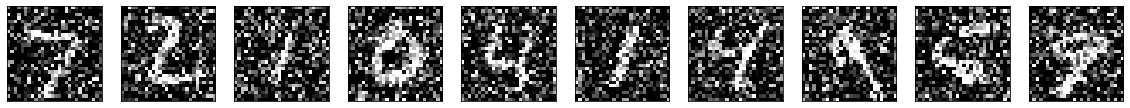

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

n = 10
plt.figure(figsize=(20,2))
for i in range(n):
    ax = plt.subplot(1,n,i+1)
    plt.imshow(x_test_noisy[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [6]:
from keras.layers import Input,Dense,Conv2D,MaxPooling2D,UpSampling2D
from keras.models import Model,load_model

input_img = Input(shape=(28,28,1,))

In [7]:
x = Conv2D(32,(3,3),padding='same',activation='relu')(input_img)
x = MaxPooling2D((2,2),padding='same')(x)
x = Conv2D(32,(3,3),padding='same',activation='relu')(x)
encoded = MaxPooling2D((2,2),padding='same')(x)

In [8]:
x = Conv2D(32,(3,3),padding='same',activation='relu')(encoded)
x = UpSampling2D((2,2))(x)
x = Conv2D(32,(3,3),padding='same',activation='relu')(x)
x = UpSampling2D((2,2))(x)
decoded = Conv2D(1,(3,3),padding='same',activation='sigmoid')(x)

In [9]:
autoencoder = Model(inputs=input_img,outputs=decoded)
autoencoder.compile(optimizer='adam',loss='binary_crossentropy')

In [10]:
autoencoder.fit(x_train_noisy,x_train,epochs=100,batch_size=128,shuffle=True,validation_data=(x_test_noisy,x_test))
autoencoder.save('autoencoder.h5')

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 21s 345us/step - loss: 0.1634 - val_loss: 0.1180
Epoch 2/100
60000/60000 [==============================] - 5s 86us/step - loss: 0.1145 - val_loss: 0.1095
Epoch 3/100
60000/60000 [==============================] - 5s 86us/step - loss: 0.1087 - val_loss: 0.1060
Epoch 4/100
60000/60000 [==============================] - 5s 86us/step - loss: 0.1053 - val_loss: 0.1035
Epoch 5/100
60000/60000 [==============================] - 5s 86us/step - loss: 0.1030 - val_loss: 0.1010
Epoch 6/100
60000/60000 [==============================] - 5s 86us/step - loss: 0.1014 - val_loss: 0.0998
Epoch 7/100
60000/60000 [==============================] - 5s 86us/step - loss: 0.1003 - val_loss: 0.0988
Epoch 8/100
60000/60000 [==============================] - 5s 87us/step - loss: 0.0995 - val_loss: 0.0990
Epoch 9/100
60000/60000 [==============================] - 5s 87us/step - loss: 0.0988 - val_loss: 0

60000/60000 [==============================] - 5s 87us/step - loss: 0.0930 - val_loss: 0.0931
Epoch 78/100
60000/60000 [==============================] - 5s 87us/step - loss: 0.0929 - val_loss: 0.0929
Epoch 79/100
60000/60000 [==============================] - 5s 88us/step - loss: 0.0929 - val_loss: 0.0929
Epoch 80/100
60000/60000 [==============================] - 5s 88us/step - loss: 0.0929 - val_loss: 0.0930
Epoch 81/100
60000/60000 [==============================] - 5s 87us/step - loss: 0.0929 - val_loss: 0.0931
Epoch 82/100
60000/60000 [==============================] - 5s 87us/step - loss: 0.0929 - val_loss: 0.0931
Epoch 83/100
60000/60000 [==============================] - 5s 86us/step - loss: 0.0929 - val_loss: 0.0928
Epoch 84/100
60000/60000 [==============================] - 5s 86us/step - loss: 0.0929 - val_loss: 0.0933
Epoch 85/100
60000/60000 [==============================] - 5s 86us/step - loss: 0.0929 - val_loss: 0.0930
Epoch 86/100
60000/60000 [========================

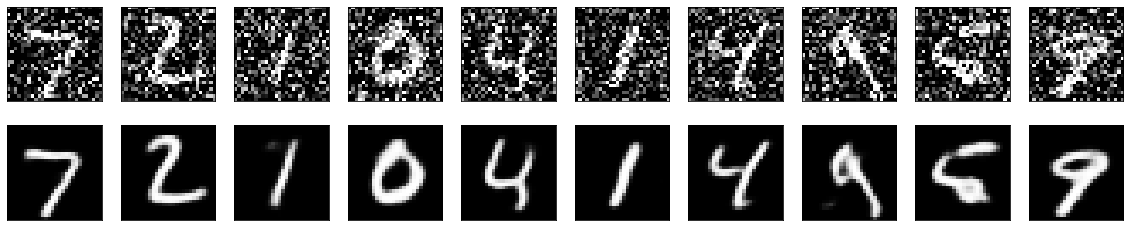

In [12]:
autoencoder = load_model('autoencoder.h5')
decoded_imgs = autoencoder.predict(x_test_noisy)

n = 10
plt.figure(figsize=(20,4))
for i in range(n):
    # display original
    ax = plt.subplot(2,n,i+1)
    plt.imshow(x_test_noisy[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
       
    # display reconstruction
    ax = plt.subplot(2,n,i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False) 
plt.show()